## ANALISIS SENTIMEN NETIZEN TWITTER TERHADAP KEBIJAKAN KULIAH ONLINE MENGGUNAKAN MACHINE LEARNING

## LOAD DATASET

In [69]:
import string
import pandas as pd 

data = pd.read_csv('dataset_raw.csv', sep=',',encoding='latin1')
data.head(10)

,text,sentimen
0,Presiden Jokowi menyatakan kuliah online kini ...,Positive
1,"yallah semoga kuliah online terus, nilaiku bagus2",Positive
2,masih mending bayar kuota drpd bayar biaya rum...,Positive
3,kok jadi nyaman sama kuliah online ya....,Positive
4,gw seneng bgt d akhirnya dosen2 atma ga susah ...,Positive
5,Tujuan kuliah online tuh biar transmisi antar ...,Positive
6,"Nggak, nder. Aku sayang nyawaku. kalau masyara...",Positive
7,"mls kuliah offline. dah enak kuliah online, ku...",Positive
8,ga pernah seniat ini pakai duit cuma buat skin...,Positive
9,Aku kalau di tempat rame sering deg-degan & k...,Positive


## PREPROCESSING

### 1. Cek data kosong atau Missing Value

In [70]:
print('Jumlah NaN Value pada dataset: ',len(data[data.text.isna()==True]))

Jumlah NaN Value pada dataset:  0


### 2. Case Folding

In [71]:
#casefolding : mengubah text menjadi huruf kecil 
data['text']=data['text'].str.lower()
print('Hasil case folding \n')
print(data.head())

Hasil case folding 

                                                text  sentimen
0  presiden jokowi menyatakan kuliah online kini ...  Positive
1  yallah semoga kuliah online terus, nilaiku bagus2  Positive
2  masih mending bayar kuota drpd bayar biaya rum...  Positive
3          kok jadi nyaman sama kuliah online ya....  Positive
4  gw seneng bgt d akhirnya dosen2 atma ga susah ...  Positive


In [72]:
data['sentimen']=data['sentimen'].apply(lambda x: x.lower())
print('Hasil case folding \n')
data.head()

Hasil case folding 



,text,sentimen
0,presiden jokowi menyatakan kuliah online kini ...,positive
1,"yallah semoga kuliah online terus, nilaiku bagus2",positive
2,masih mending bayar kuota drpd bayar biaya rum...,positive
3,kok jadi nyaman sama kuliah online ya....,positive
4,gw seneng bgt d akhirnya dosen2 atma ga susah ...,positive


### 3. Cleaning dan Filtering

In [73]:
import string 
import re

In [74]:
def remove_data(Text):
    #hapus tab, new line dan ans black slice
    Text = Text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    #hapus non ASCII (hapus emoticon, chinese word, dll)
    Text = Text.encode('ascii', 'replace').decode('ascii')
    #hapus mention, link, hastag
    Text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",Text).split())
    #hapus incomplete URL
    return Text.replace("http://", " ").replace("https://", " ")

data['text'] = data['text'].apply(remove_data)

#hapus nomor
def remove_number(Text):
    return re.sub(r"\d+", "", Text)

data['text'] = data['text'].apply(remove_number)

#hapus punctuation (tanda baca)
def remove_punctuation(Text):
    return Text.translate(str.maketrans("","",string.punctuation))

data['text'] = data['text'].apply(remove_punctuation)

#hapus whitespace
def remove_whitespace_LT(Text):
    return Text.strip()

data['text'] = data['text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(Text):
    return re.sub('\s+',' ',Text)

data['text'] = data['text'].apply(remove_whitespace_multiple)

#hapus single character
def remove_singl_char(Text):
    return re.sub(r"\b[a-zA-Z]\b", "", Text)

data['text'] = data['text'].apply(remove_singl_char)

data.head(10)

,text,sentimen
0,presiden jokowi menyatakan kuliah online kini ...,positive
1,yallah semoga kuliah online terus nilaiku bagus,positive
2,masih mending bayar kuota drpd bayar biaya rum...,positive
3,kok jadi nyaman sama kuliah online ya,positive
4,gw seneng bgt akhirnya dosen atma ga susah bu...,positive
5,tujuan kuliah online tuh biar transmisi antar ...,positive
6,nggak nder aku sayang nyawaku kalau masyarakat...,positive
7,mls kuliah offline dah enak kuliah online ku k...,positive
8,ga pernah seniat ini pakai duit cuma buat skin...,positive
9,aku kalau di tempat rame sering deg degan khaw...,positive


### 4. Translasi Kata Non Baku

In [75]:
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

data['text'] = data['text'].apply(normalize_alay) 
data.drop_duplicates(keep=False,inplace=True)

data.head(15)

,text,sentimen
0,presiden jokowi menyatakan kuliah online kini ...,positive
1,yallah semoga kuliah online terus nilaiku bagus,positive
2,masih mending bayar kuota daripada bayar biaya...,positive
3,kok jadi nyaman sama kuliah online ya,positive
4,gue senang banget akhirnya dosen atma tidak s...,positive
5,tujuan kuliah online itu biar transmisi antar ...,positive
6,enggak nder aku sayang nyawaku kalau masyaraka...,positive
7,malas kuliah offline sudah enak kuliah online ...,positive
8,tidak pernah seniat ini pakai duit cuma buat s...,positive
9,aku kalau di tempat ramai sering deg degan kha...,positive


### 5. Tokenizing

In [76]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

def word_tokenize_wrapper(Text):
    return word_tokenize(Text)

data['text'] = data['text'].apply(word_tokenize_wrapper)
print('hasil tokenize')
data.head(10)

hasil tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,sentimen
0,"[presiden, jokowi, menyatakan, kuliah, online,...",positive
1,"[yallah, semoga, kuliah, online, terus, nilaik...",positive
2,"[masih, mending, bayar, kuota, daripada, bayar...",positive
3,"[kok, jadi, nyaman, sama, kuliah, online, ya]",positive
4,"[gue, senang, banget, akhirnya, dosen, atma, t...",positive
5,"[tujuan, kuliah, online, itu, biar, transmisi,...",positive
6,"[enggak, nder, aku, sayang, nyawaku, kalau, ma...",positive
7,"[malas, kuliah, offline, sudah, enak, kuliah, ...",positive
8,"[tidak, pernah, seniat, ini, pakai, duit, cuma...",positive
9,"[aku, kalau, di, tempat, ramai, sering, deg, d...",positive


### 6. Stopword Removal

In [77]:
import nltk
from nltk.corpus import stopwords

def stopward_removal(text):
    filtering =  stopwords.words('indonesian','english')
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, text)
    for x in fit:
        data.append(x)
    return data

data['text'] = data['text'].apply(stopward_removal)
data.head()

,text,sentimen
0,"[presiden, jokowi, menyatakan, kuliah, online,...",positive
1,"[yallah, semoga, kuliah, online, nilaiku, bagus]",positive
2,"[masih, mending, bayar, kuota, daripada, bayar...",positive
3,"[nyaman, kuliah, online, ya]",positive
4,"[gue, senang, banget, dosen, atma, tidak, susa...",positive


### 7. Stemming

In [78]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmer_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("-----------------------")

for term in term_dict:
    term_dict[term] = stemmer_wrapper(term)
    print(term, ":" , term_dict[term])
    
print(term_dict)
print("-----------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['text'] = data['text'].apply(get_stemmed_term)
print(data.head())

957
-----------------------
presiden : presiden
jokowi : jokowi
menyatakan : nyata
kuliah : kuliah
online : online
new : new
normal : normal
pandemi : pandemi
daring : daring
depannya : depan
tumbuh : tumbuh
normalitas : normalitas
inovatif : inovatif
produktif : produktif
yallah : yallah
semoga : moga
nilaiku : nilai
bagus : bagus
masih : masih
mending : mending
bayar : bayar
kuota : kuota
daripada : daripada
biaya : biaya
rumah : rumah
sakit : sakit
giliran : gilir
menyalahkan : salah
menteri : menteri
nya : nya
menyuruh : suruh
sekolah : sekolah
disuruh : suruh
belajar : ajar
mengeluh : keluh
gara : gara
dibaca : baca
judul : judul
terima : terima
kasih : kasih
nyaman : nyaman
ya : ya
gue : gue
senang : senang
banget : banget
dosen : dosen
atma : atma
tidak : tidak
susah : susah
buat : buat
nilai : nilai
mahasiswanya : mahasiswa
kayak : kayak
menguntungkan : untung
tujuan : tuju
biar : biar
transmisi : transmisi
daerah : daerah
minim : minim
kampus : kampus
beragam : agam
sabang : s

tanggung : tanggung
mencoba : coba
diselamatkan : selamat
tim : tim
positifnya : positif
konsultasi : konsultasi
berjalan : jalan
pejuang : juang
reguler : reguler
elearning : elearning
semestert : semestert
jalan : jalan
menghabiskan : habis
bensin : bensin
dimanapun : mana
hujan : hujan
an : an
bermalasan : malas
kalinya : kali
data : data
menurutku : turut
kantin : kantin
ilmu : ilmu
kamunya : kamu
tiduran : tidur
perhatikan : perhati
ilmunya : ilmu
bangetl : bangetl
keruan : keruan
menyerap : serap
melatih : latih
ingatan : ingat
eksplorasi : eksplorasi
hadir : hadir
juli : juli
serius : serius
titik : titik
harapan : harap
ekspektasi : ekspektasi
fix : fix
ragu : ragu
bandung : bandung
kontrakan : kontra
mengajak : ajak
negara : negara
maju : maju
permanen : permanen
kawan : kawan
melelahkan : lelah
egois : egois
stop : stop
kesana : kesana
kemari : kemari
covid : covid
muak : muak
suruh : suruh
kepentingan : penting
layaknya : layak
horor : horor
sanggup : sanggup
disclaimer : di

### 8. Save Data Pre-Processing

In [79]:
data.to_csv('datacleaned.csv', index=False)
data_bersih = pd.read_csv('datacleaned.csv', sep=',',encoding='latin1')

In [80]:
def string_tolist(Teks):
    return Teks[1:-1].split(",")

data_bersih['text'] = data_bersih['text'].apply(string_tolist)


In [81]:
def list_tosring(Teks):
    return ','.join(Teks)
data_bersih['text'] = data_bersih['text'].apply(list_tosring)

In [82]:
#hapus punctuation (tanda baca)
def remove_punctuation(Teks):
    return Teks.translate(str.maketrans("","",string.punctuation))

data_bersih['text'] = data_bersih['text'].apply(remove_punctuation)
data_bersih.head(10)

,text,sentimen
0,presiden jokowi nyata kuliah online new normal...,positive
1,yallah moga kuliah online nilai bagus,positive
2,masih mending bayar kuota daripada bayar biaya...,positive
3,nyaman kuliah online ya,positive
4,gue senang banget dosen atma tidak susah buat ...,positive
5,tuju kuliah online biar transmisi daerah minim...,positive
6,nder sayang nyawa masyarakat peduli ya biar ma...,positive
7,malas kuliah offline enak kuliah online ku int...,positive
8,tidak niat pakai duit buat skincare berat bang...,positive
9,ramai deg degan khawatir nder pas kuliah onlin...,positive


## Data Visualization

### 1. Word Cloud Sentimen Positive

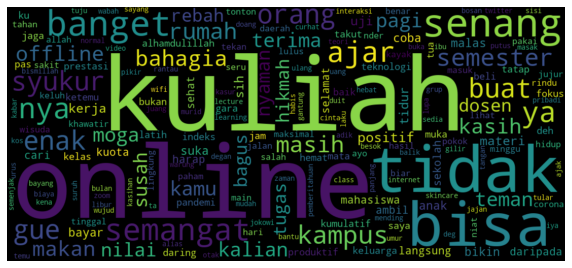

In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data_bersih = data_bersih['text']
allword = ' '.join([text for text in data_bersih[0:150]])
wordcloud = WordCloud(width=1100, height=500,
                     max_font_size =200,
                      collocations =False).generate(allword)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
data_bersih = pd.read_csv('datacleaned.csv', sep=',',encoding='latin1')

### 2. Word Cloud Sentimen Negative

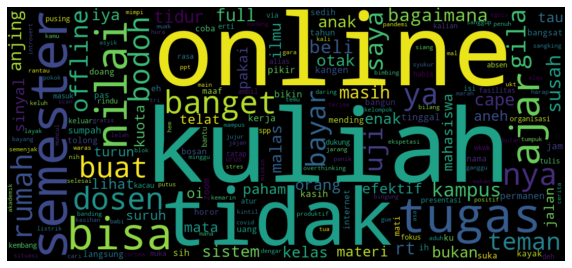

In [83]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data_bersih = data_bersih['text']
allword = ' '.join([text for text in data_bersih[151:300]])
wordcloud = WordCloud(width=1100, height=500,
                     max_font_size =200,
                      collocations =False).generate(allword)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
data_bersih = pd.read_csv('datacleaned.csv', sep=',',encoding='latin1')
data_bersih['text'] = data_bersih['text'].apply(string_tolist)
data_bersih['text'] = data_bersih['text'].apply(list_tosring)
data_bersih['text'] = data_bersih['text'].apply(remove_punctuation)

In [65]:
#mendefinisikian tipe data untuk kolom sentimen merupakan category dan kolom text merupakan string
data_bersih = data_bersih.astype({'sentimen':'category'})
data_bersih = data_bersih.astype({'text':'string'})
data_bersih.dtypes

text          string
sentimen    category
dtype: object

## EKSTRAKSI FITUR TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_bersih['text'].astype('U'))
print(text_tf)

  (0, 574)	0.21331445986086717
  (0, 264)	0.2695202811493445
  (0, 504)	0.2695202811493445
  (0, 754)	0.2695202811493445
  (0, 160)	0.25132889141469106
  (0, 149)	0.21331445986086717
  (0, 531)	0.21331445986086717
  (0, 503)	0.25132889141469106
  (0, 493)	0.2695202811493445
  (0, 516)	0.046236695697592776
  (0, 370)	0.09278334325769526
  (0, 507)	0.2695202811493445
  (0, 294)	0.539040562298689
  (0, 569)	0.2695202811493445
  (1, 53)	0.4717111048230722
  (1, 500)	0.36517564141454983
  (1, 473)	0.45215542712864526
  (1, 789)	0.6443382457832691
  (1, 516)	0.11053740100580262
  (1, 370)	0.11090789972767078
  (2, 324)	0.13695076524876115
  (2, 725)	0.14185954257024536
  (2, 297)	0.1921591911664396
  (2, 50)	0.1921591911664396
  (2, 208)	0.3645817099678324
  :	:
  (296, 75)	0.15764778777755492
  (296, 516)	0.04136250654876723
  (296, 370)	0.04150114519659266
  (297, 406)	0.19950632303955798
  (297, 286)	0.19950632303955798
  (297, 580)	0.19950632303955798
  (297, 288)	0.19950632303955798
  (

In [67]:
tf.get_feature_names()

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['absen',
 'ac',
 'acara',
 'adik',
 'adil',
 'aduh',
 'agam',
 'ah',
 'ahli',
 'ajak',
 'ajar',
 'akademik',
 'akibat',
 'akses',
 'aktif',
 'aktivitas',
 'alam',
 'alas',
 'alat',
 'alhamdulillah',
 'alias',
 'allah',
 'alokasi',
 'alpa',
 'alternatif',
 'amal',
 'ambil',
 'ampun',
 'an',
 'anak',
 'andal',
 'aneh',
 'anggota',
 'angkat',
 'angkut',
 'anjing',
 'antuk',
 'apa',
 'arah',
 'asa',
 'asli',
 'aspek',
 'asrama',
 'astagfirullah',
 'asyik',
 'atma',
 'atur',
 'auto',
 'ayo',
 'babi',
 'baca',
 'bagaimana',
 'bagi',
 'bagus',
 'bahagia',
 'bahan',
 'baik',
 'baju',
 'bakar',
 'bakso',
 'balas',
 'balik',
 'banding',
 'bandung',
 'banget',
 'bangetl',
 'bangga',
 'bangsat',
 'bangun',
 'bantu',
 'banyak',
 'bareng',
 'baru',
 'batas',
 'bayang',
 'bayar',
 'beban',
 'begadang',
 'bejibun',
 'beli',
 'beliau',
 'benar',
 'benci',
 'bensin',
 'bentuk',
 'berangkat',
 'berani',
 'berat',
 'berita',
 'besok',
 'betah',
 'biar',
 'biasa',
 'biaya',
 'bicara',
 'bikin',
 'bilang',

In [68]:
import pandas as pd
df = pd.DataFrame(text_tf.todense().T,
                 index=tf.get_feature_names(),
                 columns=[f'D{i+1}' for i in range(len(data_bersih['text']))])
df.head(20)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D289,D290,D291,D292,D293,D294,D295,D296,D297,D298
absen,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ac,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
acara,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
adik,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
adil,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
aduh,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
agam,0.0,0.0,0.00000,0.0,0.0,0.209684,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ah,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ahli,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ajak,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


## DATA SPLITTING

In [23]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_bersih['sentimen'], test_size=0.2, random_state=42)

## MODEL TRAINING dan MODEL PREDICTION

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))

MultinomialNB Accuracy: 0.8166666666666667


## MODEL EVALUATION

### 1. Confussion Matrix

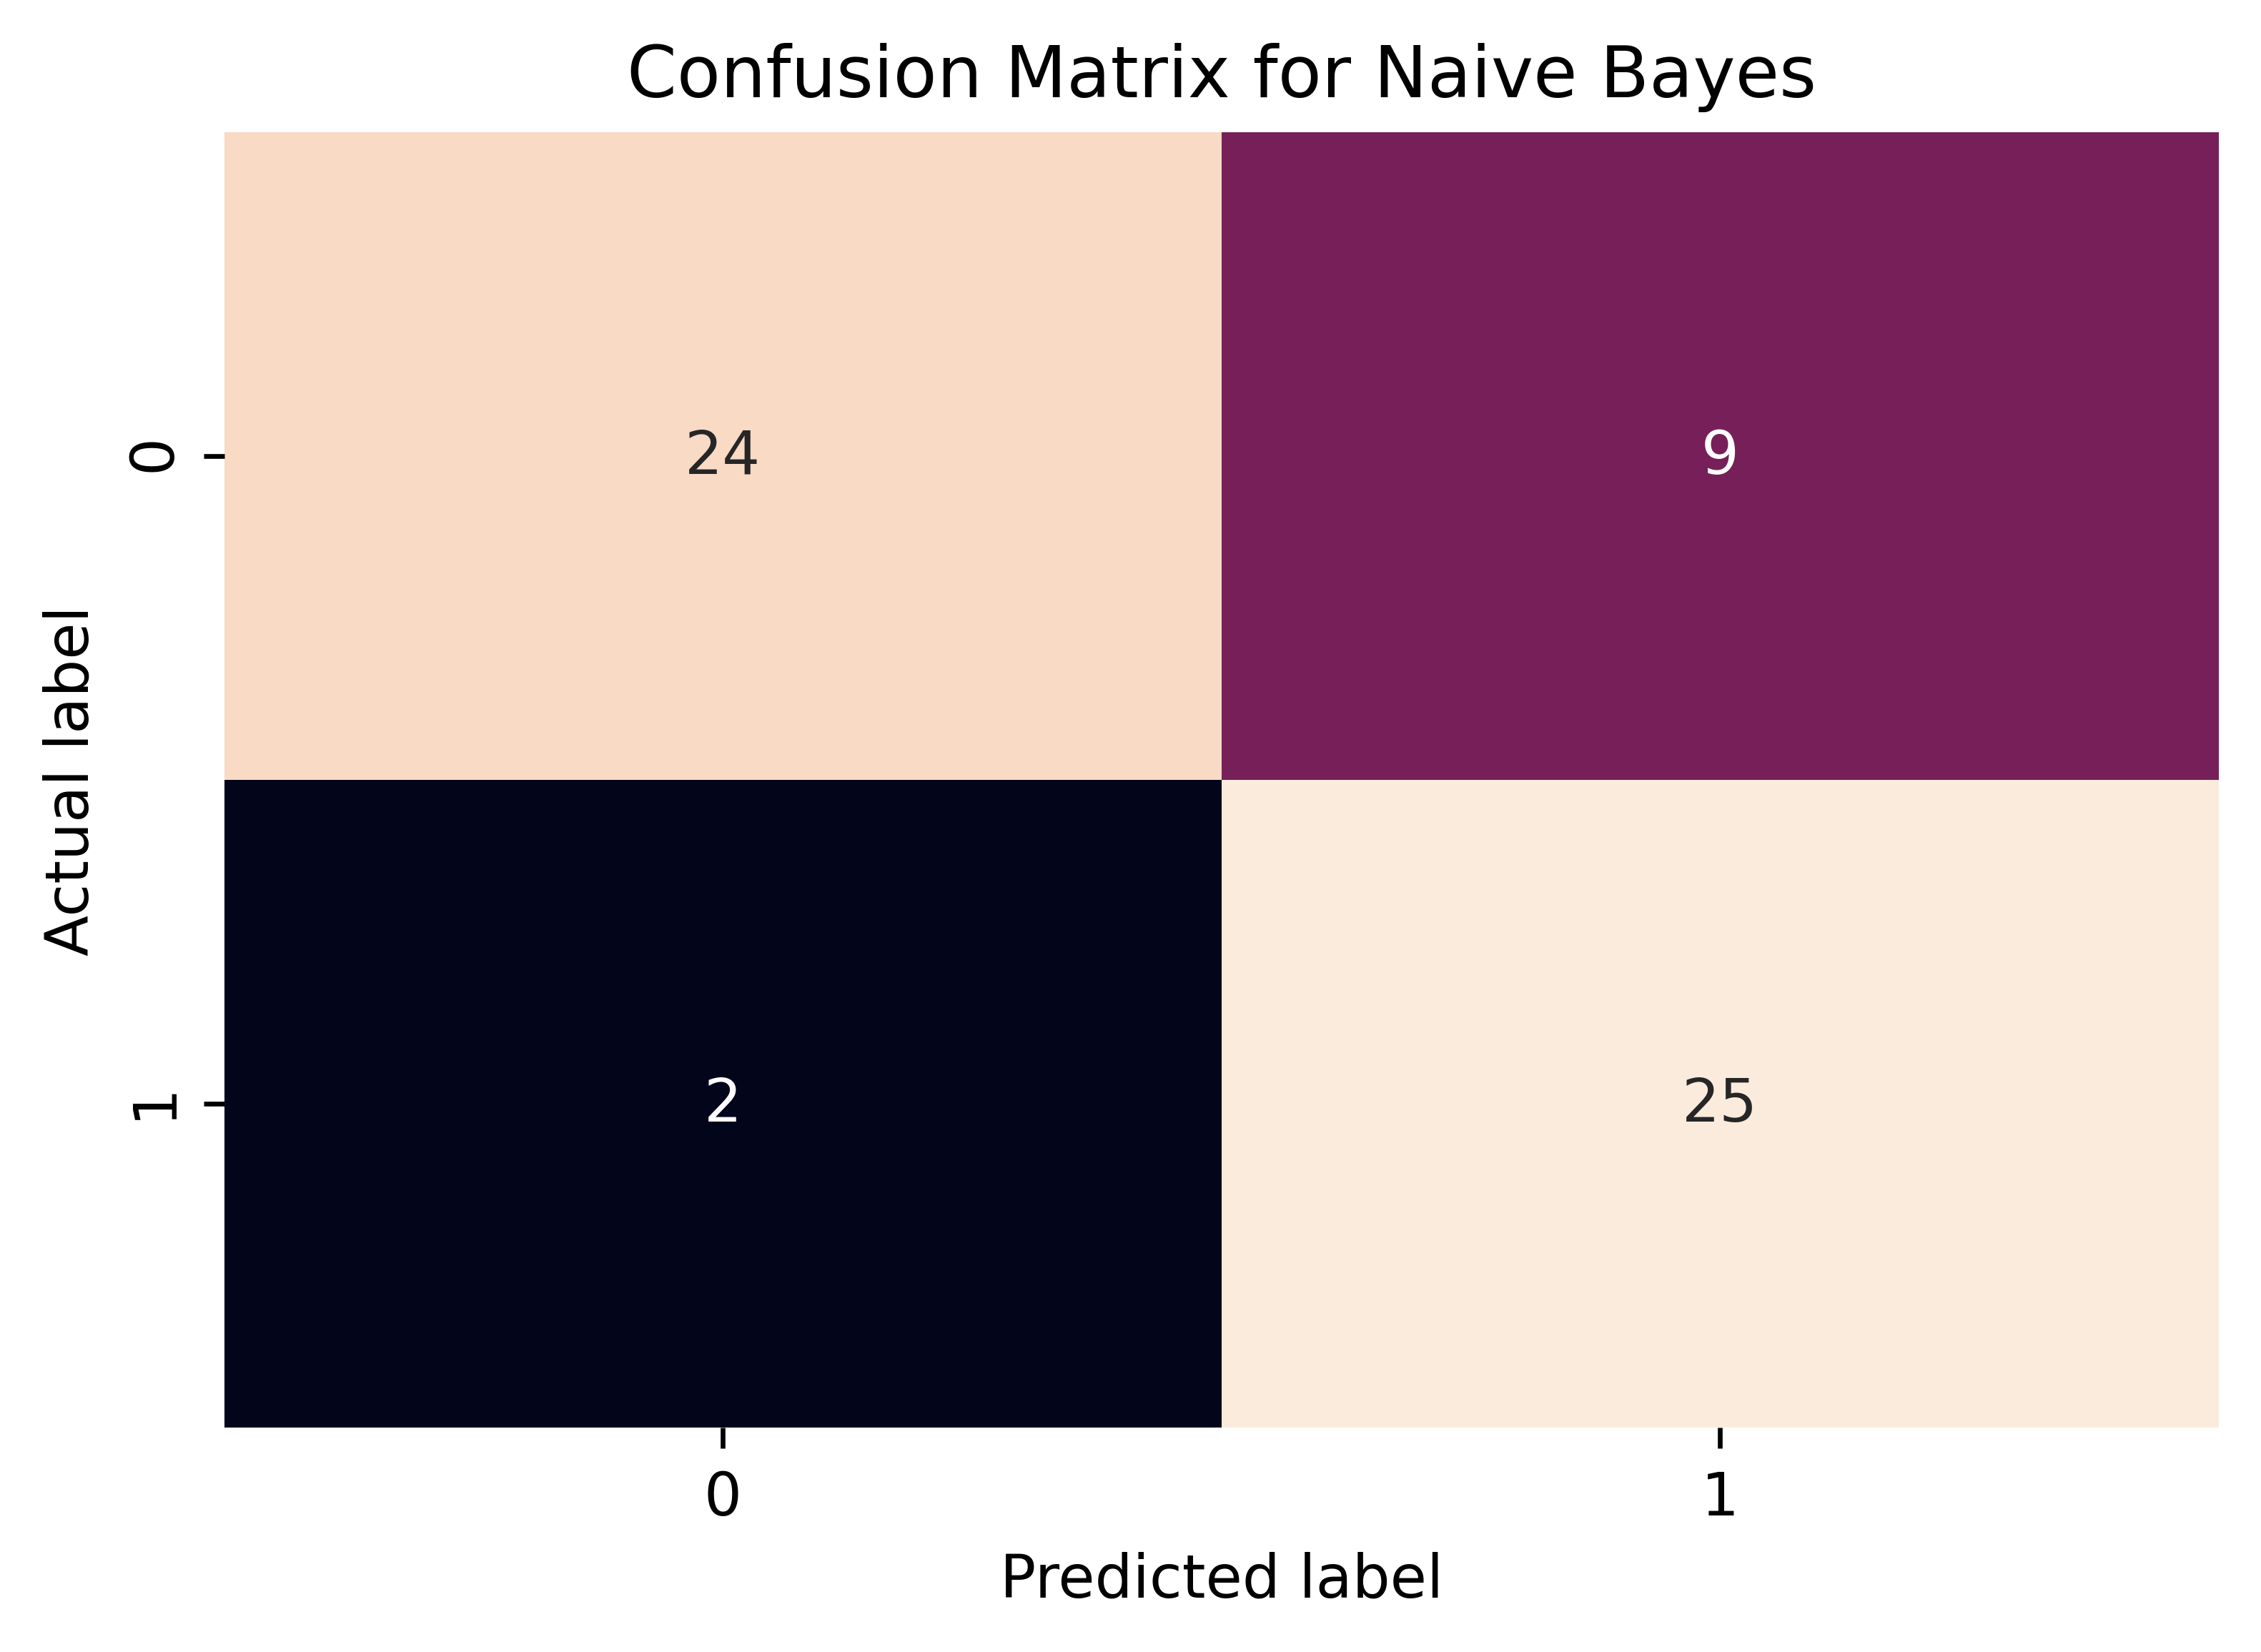

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

### 2. Precision, Recall dan F1 Score

In [26]:
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label='negative'))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label='positive'))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label='negative'))
print('\n===============================================================')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Precision: 0.7272727272727273
MultinomialNB Recall: 0.7352941176470589
MultinomialNB f1_score: 0.8135593220338984

              precision    recall  f1-score   support

    negative       0.73      0.92      0.81        26
    positive       0.93      0.74      0.82        34

    accuracy                           0.82        60
   macro avg       0.83      0.83      0.82        60
weighted avg       0.84      0.82      0.82        60



# SVM

In [29]:
from sklearn.svm import SVC
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [30]:
# confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy: 0.85 

[[25  1]
 [ 8 26]]


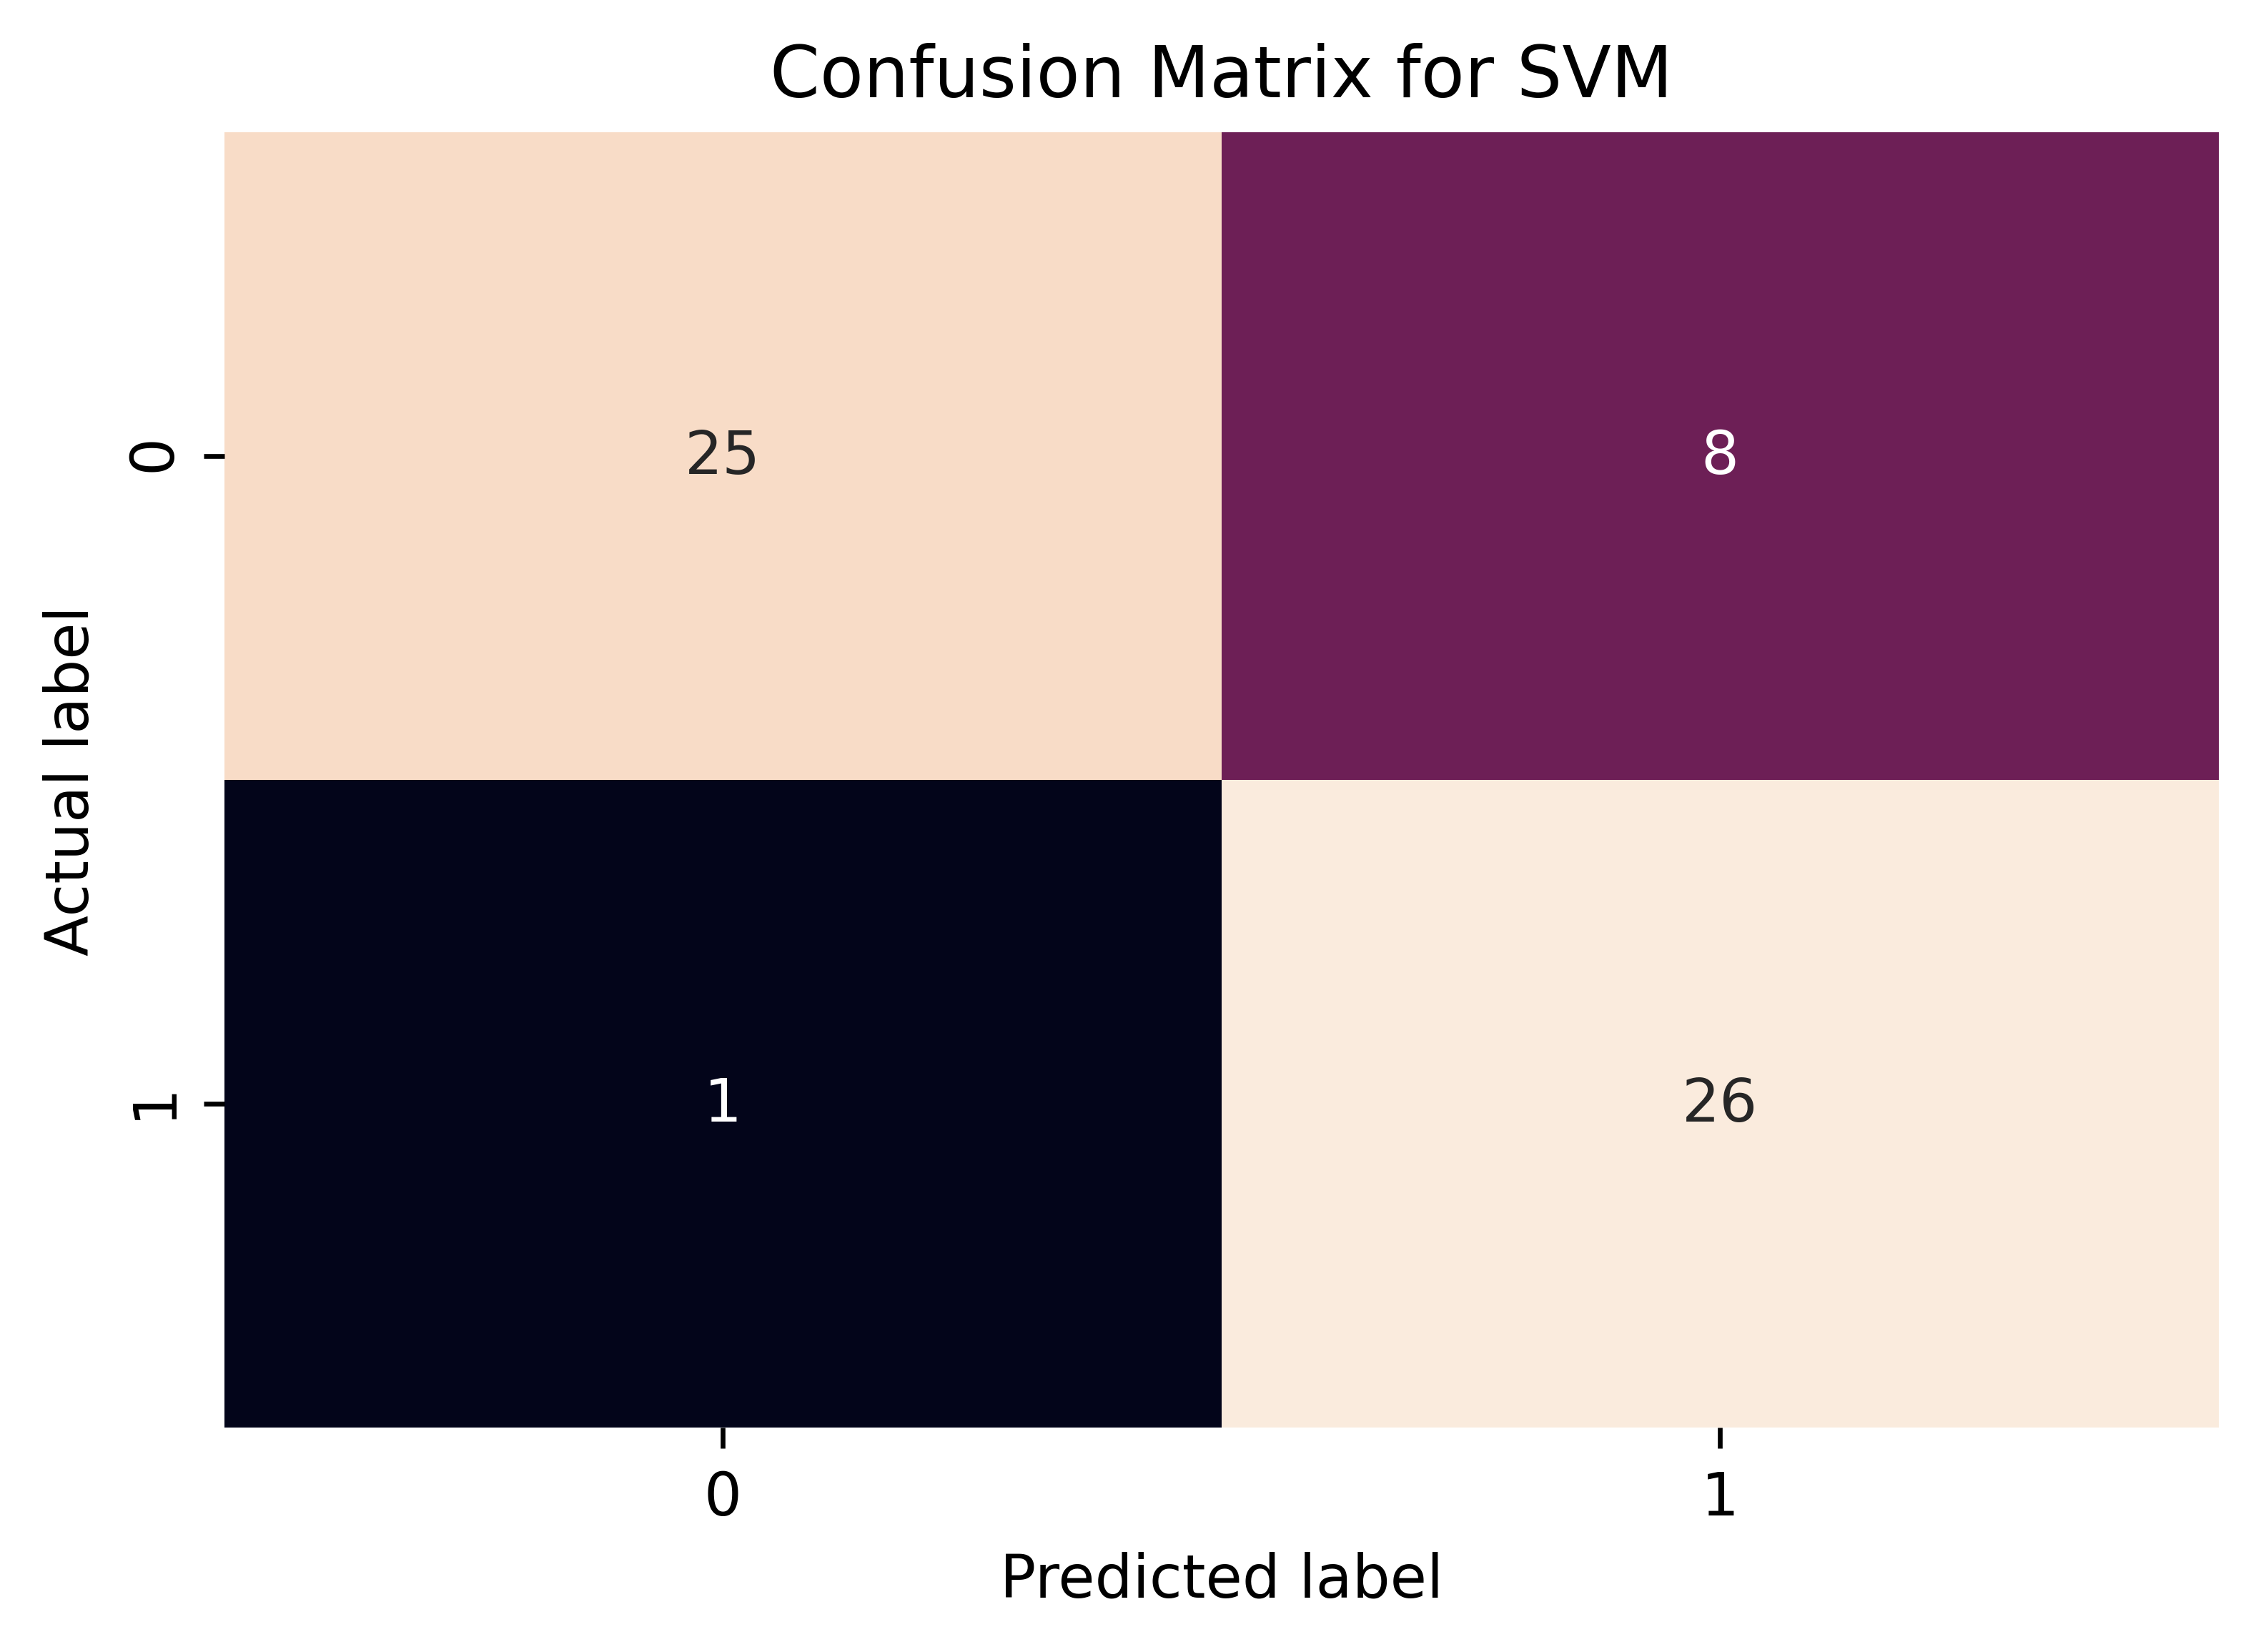

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [85]:
print("MultinomialNB Precision:", precision_score(y_test,y_pred, average="binary", pos_label='negative'))
print("MultinomialNB Recall:", recall_score(y_test,y_pred, average="binary", pos_label='positive'))
print("MultinomialNB f1_score:", f1_score(y_test,y_pred, average="binary", pos_label='negative'))
print('\n===============================================================')
print(classification_report(y_test, y_pred, zero_division=0))

MultinomialNB Precision: 0.7575757575757576
MultinomialNB Recall: 0.7647058823529411
MultinomialNB f1_score: 0.8474576271186441

              precision    recall  f1-score   support

    negative       0.76      0.96      0.85        26
    positive       0.96      0.76      0.85        34

    accuracy                           0.85        60
   macro avg       0.86      0.86      0.85        60
weighted avg       0.87      0.85      0.85        60



# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier


In [29]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[25  1]
 [ 9 25]]
accuracy_Logistic Regression : 0.833
precision_Logistic Regression : 0.833
recall_Logistic Regression: 0.833
f1-score_Logistic Regression : 0.833


### Dapat dilihat bahwa akurasi terbesar dicapai dengan menggunakan algoritma SVM